# Build a Statistics Table in Pandas
- This routine builds a more robust table of satistics than Panda's built-in *describe* funtion
- Includes a reliable *Mode* output using a histogram routine with 500 binns

D.M. Advocate Nov 2023

In [1]:
# Import key libraries and default display parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["figure.figsize"]=8,6  #10 x 8 is default figure size in Jupyter Notebook
plt.rcParams.update({'font.size': 12})

## Function to print statistics for a <u>single variable<u>

In [35]:
# Create a function to print descriptive statistics for a single variable
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    
    # Find the mode (ml) using a detailed histogram
    n, bins, patches=plt.hist(var, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    #############################################
    print('Descriptive Statistics', namestr(var_, globals()))
    print('mean:   ','{: ,.4f}'.format(np.mean(var)))
    print('median: ','{: ,.4f}'.format(np.median(var)))
    print('mode:   ','{: ,.4f}'.format(mode))
    print('sem:    ','{: ,.4f}'.format(stats.sem(var)))
    print('min:    ','{: ,.4f}'.format(np.min(var)))
    print('max:    ','{: ,.4f}'.format(np.max(var)))
    print('stdev:  ','{: ,.4f}'.format(np.std(var)))
    print('skew:   ','{: ,.4f}'.format(skew(var)))
    print('kurt:   ','{: ,.4f}'.format(kurtosis(var)))
    print('p25:    ','{: ,.4f}'.format(np.percentile(var,25)))
    print('p75:    ','{: ,.4f}'.format(np.percentile(var,75)))
    print('p05:    ','{: ,.4f}'.format(np.percentile(var,5)))
    print('p95:    ','{: ,.4f}'.format(np.percentile(var,95)))
    print('count:  ','{: ,.4f}'.format(np.count_nonzero(var)))


## Function to print statistics for a <u>multiple variables<u>
- Accepts a list of variables and prints the variable name at the top of the printout

In [36]:
def my_stats2(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    for i in var:
        # Find the mode (ml) using a detailed histogram
        n, bins, patches=plt.hist(i, bins=500, edgecolor='gray', density=True, alpha=.2)
        plt.close()
        mode_index = n.argmax()
        mode=(bins[mode_index] + bins[mode_index+1])/2
        #############################################
        print(namestr(i, globals()))
        print('mean:   ','{: ,.4f}'.format(np.mean(i)))
        print('median: ','{: ,.4f}'.format(np.median(i)))
        print('mode:   ','{: ,.4f}'.format(mode))
        print('sem:    ','{: ,.4f}'.format(stats.sem(i)))
        print('min:    ','{: ,.4f}'.format(np.min(i)))
        print('max:    ','{: ,.4f}'.format(np.max(i)))
        print('stdev:  ','{: ,.4f}'.format(np.std(i)))
        print('skew:   ','{: ,.4f}'.format(skew(i)))
        print('kurt:   ','{: ,.4f}'.format(kurtosis(i)))
        print('p25:    ','{: ,.4f}'.format(np.percentile(i,25)))
        print('p75:    ','{: ,.4f}'.format(np.percentile(i,75)))
        print('p05:    ','{: ,.4f}'.format(np.percentile(i,5)))
        print('p95:    ','{: ,.4f}'.format(np.percentile(i,95)))
        print('count:  ','{: ,.4f}'.format(np.count_nonzero(i)))

## Data
Dataset 1 - Filtered top 100 producing USA oil feilds - koeb= Thousand oil equivalten barrels, lkoeb is the log of koeb.   
Dataset 2 - Standard Normal PDF as a benchmark for the statisical measures which are well known

In [4]:
# DATASET 1 koeb and lkoeb - Test Data
oeb=[238050,99787,79080,47259,62046,29487,15833,19996,23703,27346,19587,11665,25793,18291,28766,25494,1187,8492,
   17587,19396,15880,12922,35280,8930,13801,24808,23832,5452,3782,7825,307,4912,11793,5335,13496,6424,4051,5498,
   4011,7106,23360,8186,14306,7277,3694,10242,2476,5755,6116,3519,4407,7229,8808,8294,3737,5115,3441,4930,2348,
   4820,8226,3925,4308,3223,2563,6730,7484,21206,3093,3586,5660,5044,10421,2032,3516,3187,2415,3464,5111,4024,4131,
   2733,3840,4010,8247,3378,1790,1937,2270,3319,2251,6151,3325,2326,2096]
koeb=np.array(oeb)
lkoeb=np.log(koeb)

fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=False, sharex=False)
axes[0].hist(koeb, bins=50, edgecolor='k', alpha=.5 )
axes[1].hist(lkoeb, bins=50, edgecolor='k', alpha=.5 )
axes[0].set_title('koeb', fontsize=18)
axes[1].set_title('lkoeb', fontsize=18)
axes[0].set_xlabel('Values', fontsize=16)
axes[1].set_xlabel('Values', fontsize=16)
axes[0].set_ylabel('Frequency', fontsize=16)

plt.show()

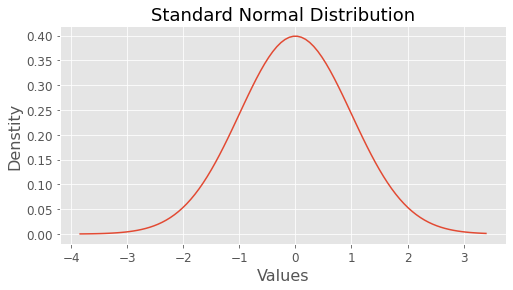

In [33]:
# Second dataset is a standard normal distribution
from scipy.stats import norm
mean = 0
std = 1

fig = plt.subplots(figsize=(8,4))
nvals = norm.rvs(loc=mean, scale=std, size=10000, random_state=None)
nx = np.linspace(np.min(nvals), np.max(nvals), 100)
ny=norm.pdf(nx, mean, std)

plt.plot(nx, ny)
plt.title('Standard Normal Distribution', fontsize=18)
plt.xlabel('Values', fontsize=16)
plt.ylabel("Denstity", fontsize=16)
plt.show()

##  Routine to write Descriptive Statistics Dataframe
**Creates a table of statistics for muliple variables**
- Requires inputs in 2 places (look for #<<<<<<<):  
1) Data (arrays) variables to analyze     
2) List variable names in pd.concat statement

In [38]:
# Calculate Statsitics from data arrays and summarize in a Dataframe
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats

vars = [koeb, lkoeb, nvals]           #<<<<<<<< List Variables to Analyze <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

####################################################################
# This block of code accepts a list of numeric data arrays and outputs the variable names
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

output= []
for i in vars:
    names = (namestr(i, globals()))
    output.append(names)
var_names= [list[0] for list in output]
######################################################################

##################### CALCULATE STATISTICS ######################################
out=[]
for i in vars:
    ############# Find the mode (ml) using a detailed histogram ########
    n, bins, patches=plt.hist(i, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    #####################################################################
    mean   =np.mean(i)
    median =np.median(i)
    std    =stats.sem(i)
    Min    =np.min(i)
    Max    =np.max(i)
    std    =np.std(i)
    skw    =skew(i)
    kurt   =kurtosis(i)
    p25    =np.percentile(i,25)
    p75    =np.percentile(i,75)
    p05    =np.percentile(i,5)
    p95    =np.percentile(i,95)
    n      =np.count_nonzero(i)
    out.append([mean, median, mode, std, Min, Max, std, skw, kurt, p25, p75, p05, p95, n])
    ############################################################################

# Merge the frequency and bins arrays into a dataframe
rows= ['MEAN', 'MEDIAN', 'MODE', 'STD', 'MIN', 'MAX', 'STD', 'SKEW', 'KURT', 'P25', 'P75', 'P05', 'P95', 'N' ]

# Dataframe of statistic measures
df_rows = pd.DataFrame(rows)


# DataFrame where assigned variable names and set to indexed position in the OUT array above
cnt=len(vars)
j=0
while(j < cnt):
    for i in var_names:
        globals()["df_"+str(i)]=pd.DataFrame(out[j])
        j=j+1
        

# Concatenate the Rows and Stats DataFrames
df  = pd.concat([df_rows, df_koeb, df_lkoeb, df_nvals], axis=1)  #<<<<<< List Variables <<<<<<<<<<<<<<<<<<<<<<<

cols=['STAT']+var_names
df.columns=[cols]
pd.options.display.float_format = "{:,.1f}".format
display(df)


,STAT,koeb,lkoeb,nvals
0,MEAN,"14,035.5",8.9,-0.0
1,MEDIAN,"5,755.0",8.7,-0.0
2,MODE,"3,397.7",8.3,0.1
3,STD,"27,749.2",1.0,1.0
4,MIN,307.0,5.7,-3.8
5,MAX,"238,050.0",12.4,3.4
6,STD,"27,749.2",1.0,1.0
7,SKEW,6.0,0.5,-0.0
8,KURT,43.1,1.1,-0.1
9,P25,"3,552.5",8.2,-0.7


# Some useful code routines

## Get a list of Dataframes, filter the list and remove quotes

In [41]:
# Routine for printing a list of Dataframes
inputList = %who_ls DataFrame

filt1 = filter(lambda k: k != 'df', inputList)
filt2 = filter(lambda k: k != 'df_rows', filt1)

# # Convert the filter object to a list using the list() function
result = list(filt2)

# Remove Quotes
result2=(f"[{', '.join(result)}]")

# Remove square braces
res = str(result2)[1:-1]


print(res)

## Converts numeric named arrays to a list of variable names
This is the answer to my Stackoverflow question
https://stackoverflow.com/questions/25050311/extract-first-item-of-each-sublist-in-python
- Accepts a list of named numeric arrays and outputs the names of the arrays with quote marks

In [42]:
a = [1, 2, 3]
b = [4, 5 ,6]

data=[a, b]

# This block of code accepts a list of numeric data arrays and outputs the variable names
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

output= []
for j in data:
    names = (namestr(j, globals()))
    output.append(names)
    
data_names= [list[1] for list in output]

print('Intermediate result:', output)
print('Intermediate result:', names)
print('Final result:', data_names)

Intermediate result: [['j', 'a'], ['j', 'b']]
Intermediate result: ['j', 'b']
Final result: ['a', 'b']
